<a href="https://colab.research.google.com/github/Ashik9576/NLP/blob/main/Tekno_Assign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Key Objectives**
Prepare the following deliverables and present under time constraints with the limited
information and with logical assumptions as required. Kindly study the details as mentioned
in the assignment. Kindly note any references and assumptions at the bottom.

# **Key Deliverables**
1. Using NLP, classify questions into 1 umbrella term to form groups of similar questions
2. Associate a risk score per term

# **Context and Data**
The dataset provided refers to the assessment of level of risk for specific areas and in the context of a construction site. The auditors need to proceed with different type of assessment replying to specific questions and judge the level of risk (At risk or Positive). A risk rating is associated to every risk based on the judgement of the auditors. Refer to the dataset provided to complete the requested key deliverables.

A brief explanation of the data is given here:

* Area Id (integer) - Unique id per area
* Area (string) - Area names
* Assessment (string) - Groups of Assessments
* Sub Assessments (string) - Groups of Sub Assessments
* Assessment Week (date) - Week in which the assessment was carried out
* Assessment Id (int) - Unique id per assessment
* Asset Id (int) - Unique id per asset
* Week range (string) - Week in which the assessment was carried out
* Questions (string) - Questions asked per assessment
* Risk or Positive (string) - Was the assessment deemed risky or not
* Risk rating (string) - Risk rating of the assessment
* Assessment date (date) - Exact date when the assessment was carried out
* Work Group Id (int) - Work Group Id of the assessment (One Work Group can have
many assessments)

# **Importing Required Libraries and mounting drive**

In [230]:
#importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import preprocessing

In [231]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Loading Dataset**

In [232]:
#loading dataset
df1=pd.read_excel('/content/drive/My Drive/ Teknobuilt Assignment/safety_ sheet.xlsx')

In [233]:
# creating copy of dataset
df=df1.copy()

# **File Structure and content**

In [234]:
#no. of row and column
print("We have {} rows.".format(df.shape[0]))
print("We have {} columns.".format(df.shape[1]))

We have 4572 rows.
We have 13 columns.


In [235]:
#accessing a rows
df.iloc[1,:]

Area Id                                                           572
Area                                          1000 - Process Train #1
Column1                                                           NaN
Assessment Week                                   2021-01-03 00:00:00
Assessment Id                                                     408
Assessment                                         Work Authorization
Asset Id                                                           37
Week Range                                      January 3 - January 9
Questions           Are all permit or work authorization documents...
Risk or Positive                                             Positive
Risk Rating                                                    Medium
Assessment Date                                   2021-01-05 00:00:00
Work Group Id                                                    1034
Name: 1, dtype: object

**At first galance, We have seen that the type of each variable and how they look like.**

# **MISSING VALUES**
Knowing about missing values is important because they indicate how much we dont's know about our data. Making inferences based on just a few cases is often unwise. In addition, many modelling procedures break down when missing values are involved and the corresponding rows will either have to be removed completely or the values need to be estimated somehow.

In [236]:
#check null values in Data frame
df.isnull().sum()

Area Id                0
Area                   0
Column1             4572
Assessment Week        0
Assessment Id          0
Assessment             0
Asset Id               0
Week Range             0
Questions              0
Risk or Positive       0
Risk Rating            0
Assessment Date        0
Work Group Id          0
dtype: int64

There is a column1 have missing value in each row so we have to drop this column

In [237]:
df.drop(df.columns[2], axis = 1, inplace = True)

In [238]:
#check null values in Data frame
df.isnull().sum()

Area Id             0
Area                0
Assessment Week     0
Assessment Id       0
Assessment          0
Asset Id            0
Week Range          0
Questions           0
Risk or Positive    0
Risk Rating         0
Assessment Date     0
Work Group Id       0
dtype: int64

# **Describing Dataset**

In [239]:
# cheking for first five rows
df.head()

,Area Id,Area,Assessment Week,Assessment Id,Assessment,Asset Id,Week Range,Questions,Risk or Positive,Risk Rating,Assessment Date,Work Group Id
0,572,1000 - Process Train #1,2021-01-03,404,General Safety,37,January 3 - January 9,Is barrier tape or rope being used?,At Risk,Medium,2021-01-07,1035
1,572,1000 - Process Train #1,2021-01-03,408,Work Authorization,37,January 3 - January 9,Are all permit or work authorization documents...,Positive,Medium,2021-01-05,1034
2,572,1000 - Process Train #1,2021-01-03,408,Work Authorization,37,January 3 - January 9,Are worker's qualified for job they are author...,Positive,Medium,2021-01-05,1034
3,572,1000 - Process Train #1,2021-01-03,408,Work Authorization,37,January 3 - January 9,Is the permit available at the worksite?,Positive,Medium,2021-01-05,1034
4,572,1000 - Process Train #1,2021-01-03,408,Work Authorization,37,January 3 - January 9,Is the work authorization documentation / perm...,Positive,Medium,2021-01-05,1034


In [240]:
# summery of dataframe
df.describe()

,Area Id,Assessment Id,Asset Id,Work Group Id
count,4572.000000,4572.000000,4572.0,4572.000000
mean,575.455599,403.274278,37.0,1034.539151
std,3.772808,4.109155,0.0,1.507075
min,572.000000,399.000000,37.0,1034.000000
25%,572.000000,399.000000,37.0,1034.000000
50%,576.000000,404.000000,37.0,1034.000000
75%,577.000000,406.000000,37.0,1035.000000
max,588.000000,415.000000,37.0,1061.000000


In [241]:
#information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Area Id           4572 non-null   int64         
 1   Area              4572 non-null   object        
 2   Assessment Week   4572 non-null   datetime64[ns]
 3   Assessment Id     4572 non-null   int64         
 4   Assessment        4572 non-null   object        
 5   Asset Id          4572 non-null   int64         
 6   Week Range        4572 non-null   object        
 7   Questions         4572 non-null   object        
 8   Risk or Positive  4572 non-null   object        
 9   Risk Rating       4572 non-null   object        
 10  Assessment Date   4572 non-null   datetime64[ns]
 11  Work Group Id     4572 non-null   int64         
dtypes: datetime64[ns](2), int64(4), object(6)
memory usage: 428.8+ KB


# **Reformating Feature**
 Label Encoding on "Risk or Positive" and "Risk Rating" column

In [242]:
df['Risk or Positive'].value_counts()

Positive    4436
At Risk      136
Name: Risk or Positive, dtype: int64

In [243]:
df['Risk Rating'].value_counts()

Low       2231
Medium    2124
High       217
Name: Risk Rating, dtype: int64

In [244]:
 # label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'Risk or Positive'.
df['Risk or Positive']= label_encoder.fit_transform(df['Risk or Positive'])
# Encode labels in column 'Area'.
df['Area']= label_encoder.fit_transform(df['Area'])
# Encode labels in column 'Assessment Week'.
df['Assessment Week']= label_encoder.fit_transform(df['Assessment Week'])



# Encode labels in column 'Risk Rating'.
df.loc[df["Risk Rating"] == "Low", "Risk Rating"] = 1
df.loc[df["Risk Rating"] == "Medium", "Risk Rating"] = 2
df.loc[df["Risk Rating"] == "High", "Risk Rating"] = 3


We encoded Risk = 0 and Positive = 1 in 'Risk or Positive' column.

We encoded Low = 1, Medium=2 and High = 3 in 'Risk Rating' column.

In [246]:
df['Risk Rating'].value_counts()

1    2231
2    2124
3     217
Name: Risk Rating, dtype: int64

In [247]:
df['Week Range'].value_counts()

February 28 - March 6        1334
January 10 - January 16       699
February 21 - February 27     696
February 7 - February 13      613
January 31 - February 6       433
January 24 - January 30       377
January 17 - January 23       365
February 14 - February 20      40
January 3 - January 9          15
Name: Week Range, dtype: int64

In [248]:
df['Work Group Id'].value_counts()

1034    3318
1035     779
1038     258
1036     198
1037       8
1061       8
1040       3
Name: Work Group Id, dtype: int64

In [249]:
df.nunique()

Area Id              11
Area                 11
Assessment Week       9
Assessment Id        12
Assessment           12
Asset Id              1
Week Range            9
Questions           192
Risk or Positive      2
Risk Rating           3
Assessment Date      46
Work Group Id         7
dtype: int64

# **Exploratory Data Analysis**
**Area Id**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Frequency')

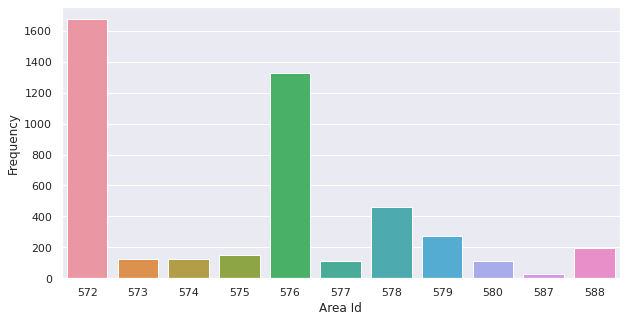

In [250]:
# Area Id
plt.figure(figsize=(10,5))
sns.countplot(df['Area Id'])
plt.xlabel('Area Id')
plt.ylabel('Frequency')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Frequency')

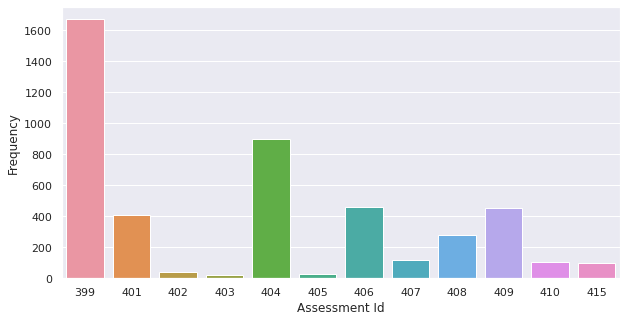

In [251]:
# Assessment Id
plt.figure(figsize=(10,5))
sns.countplot(df['Assessment Id'])
plt.xlabel('Assessment Id')
plt.ylabel('Frequency')

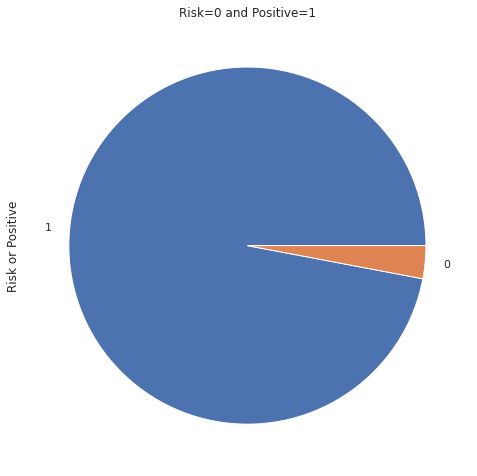

In [252]:
#Risk or Positive
a=df['Risk or Positive'].value_counts()
d=a.plot(kind='pie', figsize = (8,10), title='Risk=0 and Positive=1')

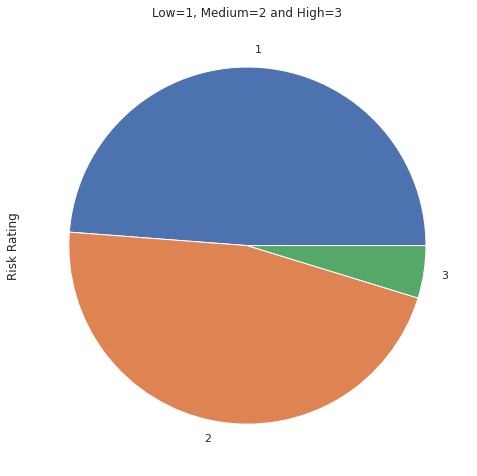

In [253]:
#Risk Rating
a=df['Risk Rating'].value_counts()
d=a.plot(kind='pie', figsize = (8,10), title='Low=1, Medium=2 and High=3')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count')

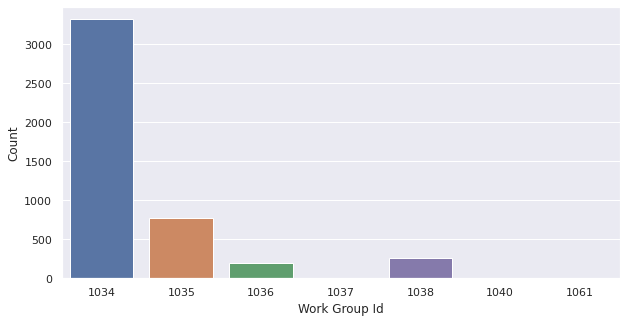

In [254]:
#Work Group Id
plt.figure(figsize=(10,5))
sns.countplot(df['Work Group Id'])
plt.xlabel('Work Group Id')
plt.ylabel('Count')

# **Model Building**

**1. Using NLP, classify questions into 1 umbrella term to form groups of similar questions**

In [255]:
#importing required libraries for NLP
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('punkt')
ps = PorterStemmer()
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [256]:
# we are performing bag of words on Question column
Ques=pd.DataFrame(df['Questions'])
Ques.head()

,Questions
0,Is barrier tape or rope being used?
1,Are all permit or work authorization documents...
2,Are worker's qualified for job they are author...
3,Is the permit available at the worksite?
4,Is the work authorization documentation / perm...


In [257]:
# we are using tokenization and bag of word on Question column
corpus = []
for i in range(0, len(Ques)):
    review = re.sub('[^a-zA-Z]', ' ', Ques['Questions'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [258]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=100)
X = cv.fit_transform(corpus).toarray()
X=pd.DataFrame(X)

In [259]:
# Encode labels in column 'Questions'.
df['Questions']= label_encoder.fit_transform(df['Questions'])

In [264]:
# taking essential column for clustering 
X=pd.DataFrame(df[['Area Id',	'Area',	'Assessment Week','Assessment Id','Asset Id','Questions','Risk or Positive','Risk Rating','Work Group Id']])

In [265]:
cols = X.columns

In [266]:
# performing min max scaler to transform all datapoints in a same scale
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [267]:
X = pd.DataFrame(X, columns=[cols])

In [268]:
#performing k means clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(X)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


KMeans(n_clusters=2, random_state=0)

In [269]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 2883 out of 4572 samples were correctly labeled.


In [270]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.63


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.

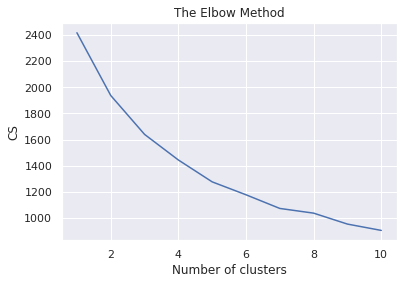

In [271]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [278]:
kmeans = KMeans(n_clusters=1, random_state=0) 

kmeans.fit(X)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


KMeans(n_clusters=1, random_state=0)

In [279]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 4570 out of 4572 samples were correctly labeled.


In [280]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 1.00


# **2. Associate a risk score per term**

In [281]:
# counting the number of occurance of each key in Risk Rating
df['Risk Rating'].value_counts()

1    2231
2    2124
3     217
Name: Risk Rating, dtype: int64

In [292]:
# Finding the Risk Percentage of each key
a=round((2231*100)/(2231+2124+217),2)
b=round((2124*100)/(2231+2124+217),2)
c=round((217*100)/(2231+2124+217),2)

In [293]:
print(a,b,c)

48.8 46.46 4.75


In [294]:
#creating a list of risk score
risk_score=[]
for i in df['Risk Rating']:
  if i == 1:
    risk_score.append(a)
  elif i == 2:
    risk_score.append(b)
  else:
    risk_score.append(c)

In [297]:
# adding Risk Score column to datafame 
df1['Risk_Score']=risk_score

In [298]:
# Now see the DataSet with Risk_score column
df1.head()

,Area Id,Area,Column1,Assessment Week,Assessment Id,Assessment,Asset Id,Week Range,Questions,Risk or Positive,Risk Rating,Assessment Date,Work Group Id,Risk_Score
0,572,1000 - Process Train #1,NaN,2021-01-03,404,General Safety,37,January 3 - January 9,Is barrier tape or rope being used?,At Risk,Medium,2021-01-07,1035,46.46
1,572,1000 - Process Train #1,NaN,2021-01-03,408,Work Authorization,37,January 3 - January 9,Are all permit or work authorization documents...,Positive,Medium,2021-01-05,1034,46.46
2,572,1000 - Process Train #1,NaN,2021-01-03,408,Work Authorization,37,January 3 - January 9,Are worker's qualified for job they are author...,Positive,Medium,2021-01-05,1034,46.46
3,572,1000 - Process Train #1,NaN,2021-01-03,408,Work Authorization,37,January 3 - January 9,Is the permit available at the worksite?,Positive,Medium,2021-01-05,1034,46.46
4,572,1000 - Process Train #1,NaN,2021-01-03,408,Work Authorization,37,January 3 - January 9,Is the work authorization documentation / perm...,Positive,Medium,2021-01-05,1034,46.46
